In [17]:
%%time
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

Wall time: 0 ns


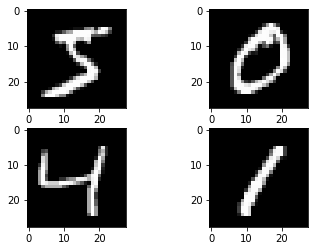

In [18]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [19]:
# fix random seed for reproducibility
seed = 0
np.random.seed(seed)

In [20]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [22]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [23]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [31]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
model = baseline_model()
# Fit the model
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2832 - accuracy: 0.9193 - val_loss: 0.1434 - val_accuracy: 0.9586
Epoch 2/10
 - 6s - loss: 0.1105 - accuracy: 0.9685 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 3/10
 - 6s - loss: 0.0706 - accuracy: 0.9797 - val_loss: 0.0851 - val_accuracy: 0.9731
Epoch 4/10
 - 6s - loss: 0.0505 - accuracy: 0.9853 - val_loss: 0.0714 - val_accuracy: 0.9783
Epoch 5/10
 - 5s - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoch 6/10
 - 5s - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0641 - val_accuracy: 0.9800
Epoch 7/10
 - 6s - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.0559 - val_accuracy: 0.9818
Epoch 8/10
 - 6s - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0629 - val_accuracy: 0.9803
Epoch 9/10
 - 6s - loss: 0.0098 - accuracy: 0.9981 - val_loss: 0.0587 - val_accuracy: 0.9816
Epoch 10/10
 - 6s - loss: 0.0075 - accuracy: 0.9987 - val_loss: 0.0590 - val_accuracy: 0.9816
Baseline Error: 1.8

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


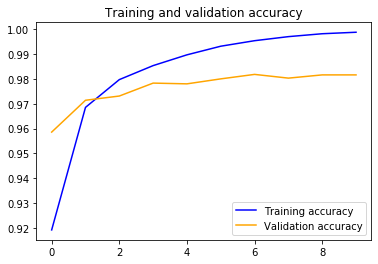

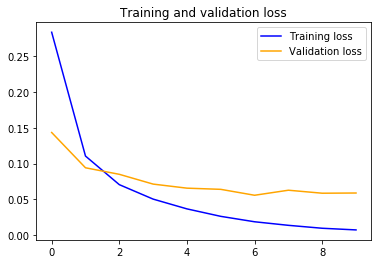

In [33]:
print(h.history.keys())

accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()